# Introduction to Autoencoder
In this tutorial, we learn what are Autoencoder and Variational Autoencoders and see some examples on mnist dataset.To run the code please read the README.md file first.

Auto-encoder is a complex mathematical model which trains on unlabeled as well as unclassified data and is used to map the input data to another compressed feature representation and from that feature representation reconstructing back the input data. 

An autoencoder is composed of an encoder(An encoder network that compresses high-dimensional input data into a lower-dimensional representation vector) and a decoder(A decoder network that decompresses a given representation vector back to the original domain) sub-models.

<img src="https://github.com/EhsanMashhadi/ENSF619-2/blob/master/assignment-04/img/compressed_representation.PNG?raw=1">

There is a nice story in this book. Suppose there are two brothers Mr.N Coder and Mr.D Coder and they have an exhibition.

When a new painting arrives for display, Mr. N. Coder simply chooses a point on the wall to represent the painting, places a marker at this point, then throws the original artwork away. When a customer requests to see the painting, Mr. D. Coder attempts to re-create the artwork using just the coordinates of the relevant marker on the wall.
Mr. N. Coder and Mr. D. Coder are using representation vectors inside a two-dimensional latent space (the wall) to encode each image.

We wil show the wall and the process of reconstructing the images in the following parts.



## Clonning the Repository

In [1]:
# First we need to clone the code
! git clone https://github.com/EhsanMashhadi/ENSF619-2
%cd /content/ENSF619-2/assignment-04/

/content
Cloning into 'ENSF619-2'...
remote: Enumerating objects: 1355, done.
remote: Counting objects: 100% (1355/1355), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 1355 (delta 1197), reused 1343 (delta 1193), pack-reused 0
Receiving objects: 100% (1355/1355), 45.56 MiB | 31.19 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.


In [3]:
# The libraries mentioned in the requirements.txt should be installed using pip
! pip install -r requirements.txt

     |████████████████████████████████| 103 kB 5.0 MB/s 
  Using cached appnope-0.1.0-py2.py3-none-any.whl (4.0 kB)
     |████████████████████████████████| 40 kB 5.7 MB/s 
  Using cached backcall-0.1.0.zip (11 kB)
  Using cached bleach-3.1.0-py2.py3-none-any.whl (157 kB)
     |████████████████████████████████| 156 kB 40.8 MB/s 
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 90 kB 8.8 MB/s 
     |████████████████████████████████| 2.9 MB 47.5 MB/s 
     |████████████████████████████████| 3.3 MB 52.4 MB/s 
     |████████████████████████████████| 116 kB 52.3 MB/s 
     |████████████████████████████████| 775 kB 62.9 MB/s 
     |████████████████████████████████| 121 kB 62.7 MB/s 
     |████████████████████████████████| 1.0 MB 52.7 MB/s 
     |████████████████████████████████| 125 kB 56.7 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 92 kB 10.1 MB/s 
     |██████████████████████████████

In [4]:
# Importing required modules for the first code snippet
import os
import numpy as np
from utils.loaders import load_mnist
from models.AE import Autoencoder

Using TensorFlow backend.


In [6]:
# Setting required paramteres
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

# Creating required folders for running
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

# Setting the required mode
MODE =  'build'

## Load the data
MNIST contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9.

In [12]:
# Loading different data splits by using load_mnist() method
(x_train, y_train), (x_test, y_test) = load_mnist()

11493376/11490434 [==============================] - 0s 0us/step


## How is the architecture of this autoencoder?

Its architecture is a convolutional autoencoder. The encoder is a standard convolution and the decoder is transposed convolution

### what is the task of a convolutional auto-encoder
A convolutional auto-encoder is tasked with recreating its input image, after passing intermediate results through a ‘bottleneck’ of a limited size. Uses of auto-encoders include compression, noise removal, colorization, and in-painting. 

Success depends on being able to learn dataset-specific compression in the convolution kernels and dataset-specific decompression in the transposed convolution kernels.

<img src="https://github.com/EhsanMashhadi/ENSF619-2/blob/master/assignment-04/img/convloutional_representation.PNG?raw=1">


## Defining the Structure of Autoencoder

In [13]:

AE = Autoencoder(
    #Size of the input
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    #two-dimensional latent space
    , z_dim = 2
)
# Checking if the mode is "build" or not to decide about loading or running the model
if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

### Encoder Structure

In [14]:
#There are 3 steps to encoding in AE.py
#Defining the input to the encoder (the image).
#Stacking convolutional layers sequentially on top of each other.
#Flattening the last convolutional layer to a vector to the 2D latent space.
#Also the model that defines the encoder is the Keras —a model that takes an input image and encodes it into the 2D latent space.
AE.encoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 7, 7, 64)          0   

### Decoder Structure

In [15]:
#There are 4 steps to decoding in AE.py
#Defining the input to the decoder (the point in the latent space).
#Connecting the input to a Dense layer.
#Reshapping this vector into a tensor that can be fed as input into the first convolutional transpose layer
#Stack convolutional transpose layers on top of each other.
#Also, the model that defines the decoder is the Keras—a model that takes a point in the latent space and decodes it into the original image domain.
AE.decoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 14, 14, 64)        0   

### What is Transposing Convolutions?
The decoder is a mirror image of the encoder, except instead of convolutional layers, it has a convolutional transpose layers.

Transposing convolutions is changing the order of the dimensions in the convolution operation matrix, which has some interesting effects and leads to different behaviors to the regular convolutions. 



## Training the Autoencoder

In [16]:
# Setting Learning Rate, Batch Size, and Initial Epoch values
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0
EPOCH_NUMBER = 200

In [17]:
# Configure the model by setting the LR
AE.compile(LEARNING_RATE)

# Using RMSE (root mean squared error) as the loss function
# Setting the batch size, epoch number, run folder, and initial epoch to start training
AE.train(     
    x_train[:1000]
    , batch_size = BATCH_SIZE
    , epochs = EPOCH_NUMBER
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1867

Epoch 00001: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 2/200
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0827

Epoch 00002: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 3/200
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0672

Epoch 00003: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 4/200
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0619

Epoch 00004: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 5/200
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0575

Epoch 00005: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 6/200
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0562

Epoch 00006: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 7/200
1000/1000 [==============================] - 4s 4ms/step - loss: 0.055

# Autoencoder Analysis
The goal is to be able to choose a random point in the latent space, pass this through the decoder, and obtain an image of a digit that looks real.There is 3 problem to do this:
<ul>
    <li>it’s not obvious how we should even go about choosing a random point in the latent space.</li>
    <li>the lack of diversity in the generated images. Ideally, we’d like to obtain a roughly equal spread of digits when sampling randomly from our latent space.But,8 need more space than 1</li>
    <li>existing large gaps between colors containing few points</li>
</ul>


## Imports

In [18]:
# Importing required modules for the following code snippets

import matplotlib.pyplot as plt
from scipy.stats import norm
from utils.loaders import load_model

## Load the model architecture

In [19]:
AE = load_model(Autoencoder, RUN_FOLDER)

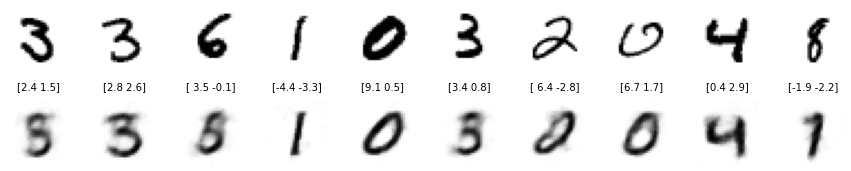

In [20]:
n_to_show = 10
# Random example
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
# Mr.N Coder job
z_points = AE.encoder.predict(example_images)
# Mr.D Coder Job(generate paintings like orginal)
reconst_images = AE.decoder.predict(z_points)
# Configuring plots
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plottin the original images
for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)   
    ax.imshow(img, cmap='gray_r')

# Plottin the reconstructed images
for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')


## Mr N. Coder's wall

The exhibition wall is shown in figure below by running this code where each black dot is a marker placed by Mr. N. Coder to represent a painting.

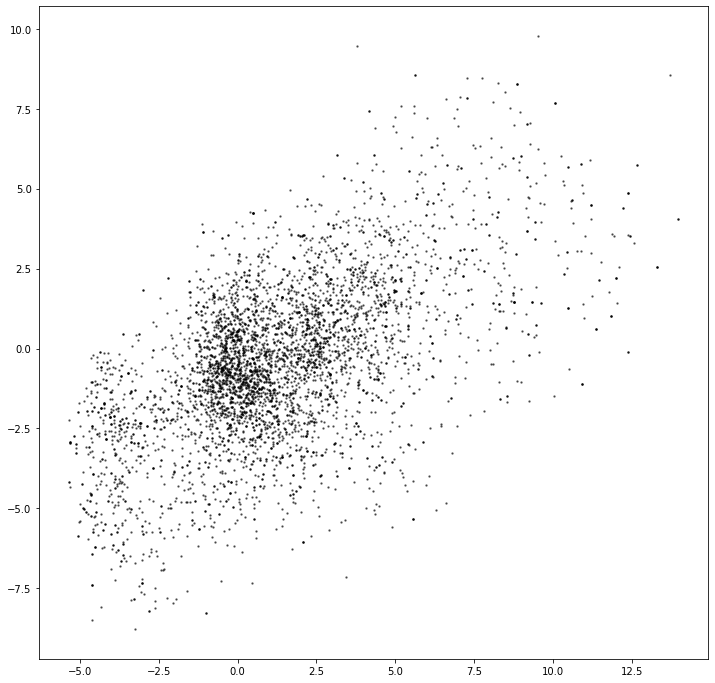

In [21]:
n_to_show = 5000
grid_size = 15
figsize = 12

# Random points
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

# Predicting the example images
z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

# Plotting the points
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

### The new generated art exhibition(Mr.D Coder task(reconstructing numbers))

One day, Mr. N. Coder has an idea. What if he randomly placed markers on parts of the wall that currently do not have a marker? Mr. D. Coder could then re-create the artwork corresponding to these points, and within a few days they would have their own exhibition of completely original, generated paintings.

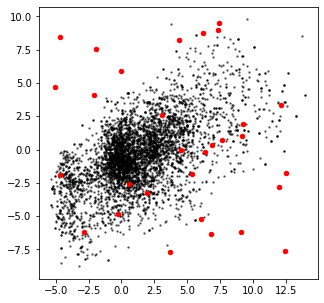

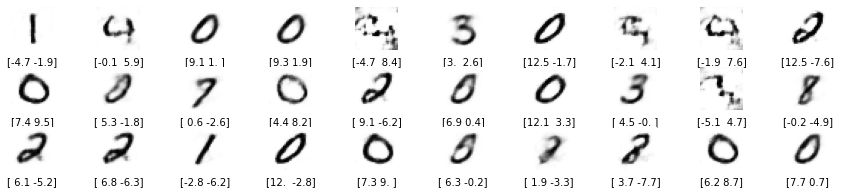

In [22]:
figsize = 5

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x,max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y,max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

After training the model, we can start to investigate how it is representing images in the latent space. 

We’ll then see how variational autoencoders are a natural extension that fixes the issues faced by autoencoders.

First, let’s take a set of new images that the model hasn’t seen, pass them through the encoder, and plot the 2D representations in a scatter plot. In fact, we’ve already seen this plot: 

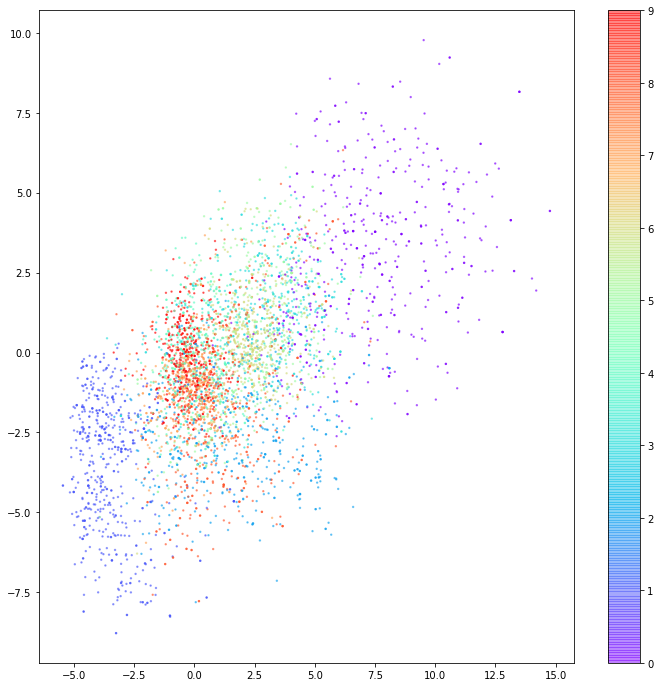

In [23]:
n_to_show = 5000
grid_size = 15
figsize = 12

# Random points
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

# Predicting the images
z_points = AE.encoder.predict(example_images)

# Plotting the points using a scatter plot
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

#divesrity of numbers have been shown in different colour(there are 5000 numbers in this plot,each number has been represented by specific color)
plt.show()

Notes:

1) The plot is not symmetrical about the point (0, 0), or bounded. For example, there are far more points with negative y-axis values than positive, and some points even extend to a y-axis value of < –30. It explains why it’s not obvious how we should even go about choosing a random point in the latent space, since the distribution of these points is undefined.

2) Some digits are represented over a very small area and others over a much larger area. It explains the lack of diversity in the generated images. Ideally, we’d like to obtain a roughly equal spread of digits when sampling randomly from our latent space.

3) There are large gaps between colors containing few points. It explains why some generated images are poorly formed. 

If you run the following code snippet you will find that in the below figure
there are some points in the latent space and their decoded images, none of which are particularly well formed.

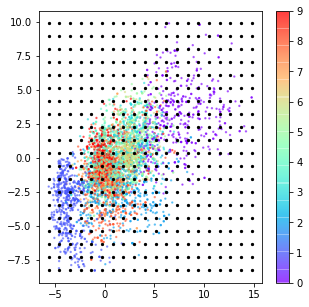

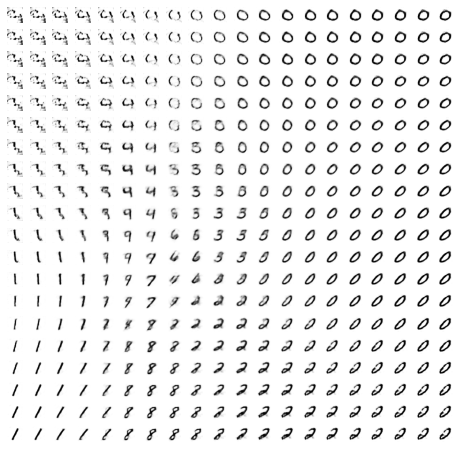

In [24]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=5)

#The constructed images that are in the space with no input are vague and also those are in the space with multiple colors(different numbers)
#As you can see the points in a specific color are clear


plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

# Variational Art Exhibition

There is a new procedure for changing the ways the paitings are marked on the wall: 

When a new painting arrives at the exhibition, Mr. N. Coder chooses a point on the wall where he would like to place the marker to represent the artwork, as before.Suppose Mr.N coder has a daughter, Epsilon. She of course takes her father’s opinion into account, so she usually places the marker somewhere near the point that he suggests.Her job is to show the point to Mr.D coder.

After training with these simple changes, Mr. N. Coder once again tries his strategy of placing markers on portions of the wall that are empty, so that Mr. D. Coder can regenerate these points as original artwork.But they have to make sure that they have generated images almost like the orginal one and also diverse images.Otherwise they may sell less ticket for the exibition.

Let’s now try to understand mathematically what we need to do to our autoencoder to convert it into a variational autoencoder and thus make it a truly generative model.



# VAE Training

In machine learning, a variational autoencoder,also known as VAE, is the artificial neural network.Variational autoencoders are meant to compress the input information into a constrained multivariate latent distribution (encoding) to reconstruct it as accurately as possible (decoding). Although this type of model was initially designed for unsupervised learning,its effectiveness has been proven in other domains of machine learning such as semi-supervised learning or supervised learning.

The **encoder** is a neural network. Its input is a datapoint x , its output is a hidden representation z , and it has weights and biases θ. To be concrete, let’s say x is a **28** by **28** -pixel photo of a handwritten number. The encoder ‘encodes’ the data which is **784**-dimensional into a latent (hidden) representation space z , which is much less than **784** dimensions. This is typically referred to as a ‘bottleneck’ because the encoder must learn an efficient compression of the data into this lower-dimensional space. Let’s denote the encoder **qθ(z|x)**. We note that the lower-dimensional space is stochastic: the encoder outputs parameters to **qθ(z|x)**, which is a Gaussian probability density. We can sample from this distribution to get noisy values of the representations z.

The **decoder** is another neural net. Its input is the representation z , it outputs the parameters to the probability distribution of the data, and has weights and biases ϕ . The decoder is denoted by **Pϕ(x|z)** . Running with the handwritten digit example, let’s say the photos are black and white and represent each pixel as 0 or 1 . The probability distribution of a single pixel can be then represented using a Bernoulli distribution. The decoder gets as input the latent representation of a digit z and outputs **784** Bernoulli parameters, one for each of the **784** pixels in the image. The decoder ‘decodes’ the real-valued numbers in z into **784** real-valued numbers between 0 and 1. Information from the original **784** -dimensional vector cannot be perfectly transmitted, because the decoder only has access to a summary of the information (in the form of a less-than- **784** -dimensional vector z). How much information is lost? We measure this using the reconstruction log-likelihood **logPϕ(x|z)** whose units are nats. This measure tells us how effectively the decoder has learned to reconstruct an input image x given its latent representation z .

The loss function of the variational autoencoder is the negative log-likelihood with a regularizer. Because there are no global representations that are shared by all datapoints, we can decompose the loss function into only terms that depend on a single datapoint **l<sub>i</sub>** The total loss is then **∑<sub>i=1</sub><sup>N</sup>** for N total datapoints. The loss function for **l<sub>i</sub>** datapoint **x<sub>i</sub>** is:

<img src="https://github.com/EhsanMashhadi/ENSF619-2/blob/master/assignment-04/img/formula1.PNG?raw=1">

The first term is the reconstruction loss, or expected negative log-likelihood of the i-th datapoint. The expectation is taken with respect to the encoder’s distribution over the representations. This term encourages the decoder to learn to reconstruct the data. If the decoder’s output does not reconstruct the data well, statistically we say that the decoder parameterizes a likelihood distribution that does not place much probability mass on the true data. For example, if our goal is to model black and white images and our model places high probability on there being black spots where there are actually white spots, this will yield the worst possible reconstruction. Poor reconstruction will incur a large cost in this loss function.

The second term is a regularizer that we throw in (we’ll see how it’s derived later). This is the Kullback-Leibler divergence between the encoder’s distribution **qθ(z|x)** and **p(z)** . This divergence measures how much information is lost (in units of nats) when using q to represent p . It is one measure of how close q is to p.

In the variational autoencoder, p is specified as a standard Normal distribution with mean zero and variance one, or **p(z) = Normal(0,1)** . If the encoder outputs representations z that are different than those from a standard normal distribution, it will receive a penalty in the loss. This regularizer term means ‘keep the representations z of each digit sufficiently diverse’. If we didn’t include the regularizer, the encoder could learn to cheat and give each datapoint a representation in a different region of Euclidean space. This is bad, because then two images of the same number (say a 2 written by different people, **2<sub>alice</sub>** and  **2<sub>bob</sub>** ) could end up with very different representations **Z<sub>alice</sub>** , **Z<sub>bob</sub>**  . We want the representation space of z to be meaningful, so we penalize this behavior. This has the effect of keeping similar numbers’ representations close together (e.g. so the representations of the digit two **Z<sub>alice</sub>** , **Z<sub>bob</sub>** , **Z<sub>ali</sub>** remain sufficiently close).

We train the variational autoencoder using gradient descent to optimize the loss with respect to the parameters of the encoder and decoder θ and ϕ . For stochastic gradient descent with step size ρ, the encoder parameters are updated using **θ←θ−ρ<sup>∂θ</sup>/<sub>∂l</sub>** and the decoder is updated similarly.


 ### Kullback–Leibler (KL) divergence
 
KL divergence is a way of measuring how much one probability distribution differs from another. In a VAE, we want to measure how different our normal distribution with parameters mu and log_var is from the standard normal distribution. In this special case, the KL divergence has the closed form:
<img src="https://github.com/EhsanMashhadi/ENSF619-2/blob/master/assignment-04/img/formula2.PNG?raw=1">

or in mathematical notation:
<img src="https://github.com/EhsanMashhadi/ENSF619-2/blob/master/assignment-04/img/formula3.PNG?raw=1">

The sum is taken over all the dimensions in the latent space. kl_loss is minimized to 0 when mu = 0 and log_var = 0 for all dimensions. As these two terms start to differ from 0, kl_loss increases.

In summary, the KL divergence term penalizes the network for encoding observations to mu and log_var variables that differ significantly from the parameters of a standard normal distribution, namely mu = 0 and log_var = 0.

Again, relating this back to our story, this term represents Epsilon’s annoyance at having to move the ladder away from the middle of the wall (mu different from 0) and also if Mr. N. Coder’s confidence in the marker position isn’t just right (log_var different from 0), both of which incur a cost.

In the code, the loss function for a VAE is simply the addition of the reconstruction loss and the KL divergence loss term. We weight the reconstruction loss with a term, r_loss_factor, that ensures that it is well balanced with the KL divergence loss. If we weight the reconstruction loss too heavily, the KL loss will not have the desired regulatory effect and we will see the same problems that we experienced with the plain autoencoder. If the weighting term is too small, the KL divergence loss will dominate and the reconstructed images will be poor. This weighting term is one of the parameters to tune when you’re training your VAE.

## imports

In [25]:
# Importing the required modules
from models.VAE import VariationalAutoencoder

In [27]:
# Setting the required parameters for saving the best model
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

# Setting the required mode
mode =  'build'

In [28]:
#in the VAE.py
#Instead of connecting the flattened layer directly to the 2D latent space, we connect it to layers mu and log_var
#The Keras model that outputs the values of mu and log_var for a given input image.
#Lambda layer samples a point z in the latent space from the normal distribution defined by the parameters mu and log_var
#The Keras model that defines the encoder—a model that takes an input image and encodes it into the 2D latent space,
#by sampling a point from the normal distribution defined by mu and log_var
vae = VariationalAutoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

if mode == 'build':
    vae.save(RUN_FOLDER)
else:
    vae.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

### Encoder Structure

In [29]:
vae.encoder.summary()

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu_29 (LeakyReLU)      (None, 28, 28, 32)   0           encoder_conv_0[0][0]             
__________________________________________________________________________________________________
encoder_conv_1 (Conv2D)         (None, 14, 14, 64)   18496       leaky_re_lu_29[0][0]             
___________________________________________________________________________________________

### Decoder Structure

In [30]:
vae.decoder.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_5 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 14, 14, 64)        0  

## training

In [37]:
LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 1000
EPOCH_NUMBERS = 200
BATCH_SIZE=32
PRINT_EVERY_BATCHES=100


In [38]:
# Setting the required paramters like lr, and loss factor to the model
vae.compile(LEARNING_RATE, R_LOSS_FACTOR)

In [33]:
BATCH_SIZE = BATCH_SIZE
EPOCHS = EPOCH_NUMBERS
PRINT_EVERY_N_BATCHES = PRINT_EVERY_BATCHES
INITIAL_EPOCH = 0

In [39]:
vae.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/200
40544/60000 [===================>..........] - ETA: 1:19 - loss: 52.9868 - vae_r_loss: 49.2985 - vae_kl_loss: 3.6883

KeyboardInterrupt: ignored

# VAE Analysis

## imports

In [40]:
# Importing the required modules
from utils.loaders import  load_model

## Loading the model

In [41]:
#Loading the saved model
vae = load_model(VariationalAutoencoder, RUN_FOLDER)

## reconstructing original paintings

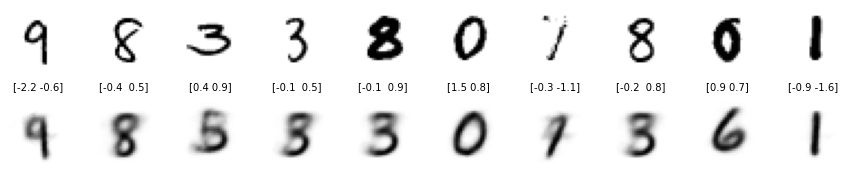

In [42]:
n_to_show = 10
#random sample points
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = vae.encoder.predict(example_images)

# Reconstructing the images using VAE
reconst_images = vae.decoder.predict(z_points)

#Setting the plots
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#Plotting the original images
for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
   #represents orginal handwritten         
    sub.imshow(img, cmap='gray_r')

#Plotting the reconstructed images
for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    #represents constructed handwritten     
    sub.imshow(img, cmap='gray_r')
   #As you may notice the constructed images are way better than previous architecture(AE.py)


## Mr N. Coder's wall

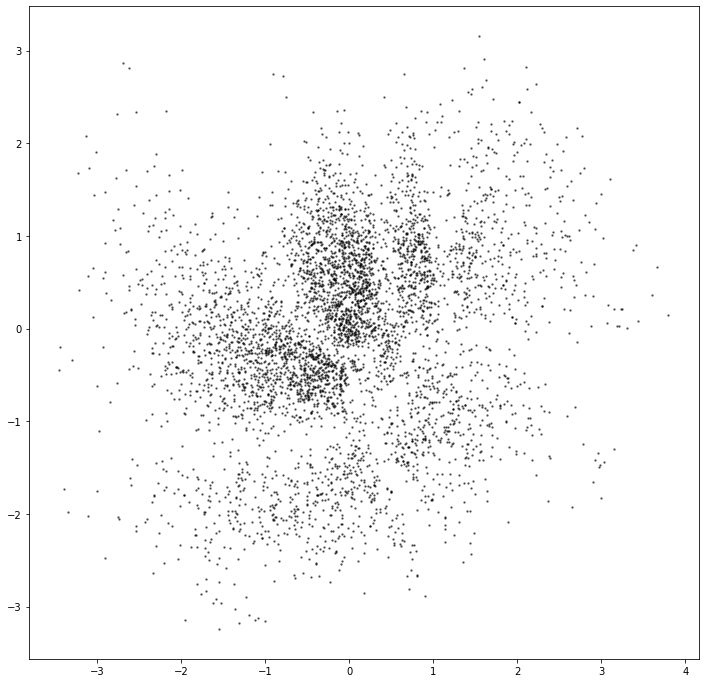

In [43]:
#the previous plot has shown the reconstruction by showing 10 points and as you can see the results were good.
#but when we choose 5000 there are a few mistakes in reconstructing the image.
#As you may notice when there are a lot of points there might be close together or overlapped that's the reason for bad reconstructing.
n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

plt.show()

### The new generated art exhibition

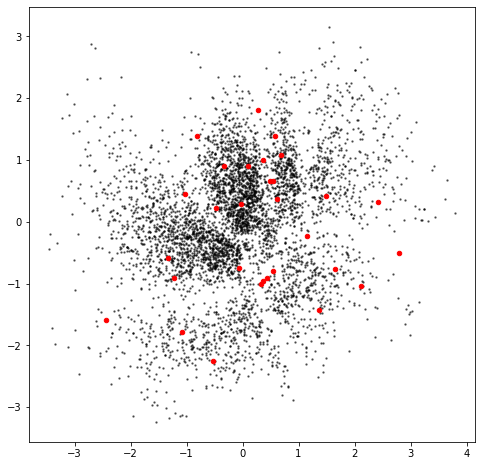

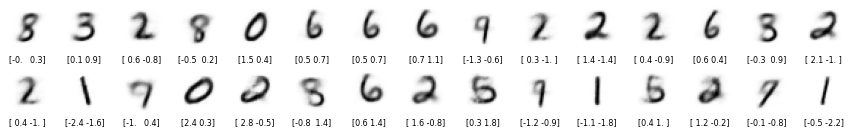

In [44]:
figsize = 8
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)


grid_size = 15
grid_depth = 2
figsize = 15

x = np.random.normal(size = grid_size * grid_depth)
y = np.random.normal(size = grid_size * grid_depth)

z_grid = np.array(list(zip(x, y)))
reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=8, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

From above figure, we can see several changes in how the latent space is organized. The black dots show the mu values of each encoded image. The KL divergence loss term ensures that the mu and sigma values never stray too far from a standard normal. We can therefore sample from the standard normal distribution to generate new points in the space to be decoded (the red dots).

Also, there are not so many generated digits that are badly formed, since the latent space is now locally continuous due to fact that the encoder is now stochastic, rather than deterministic.

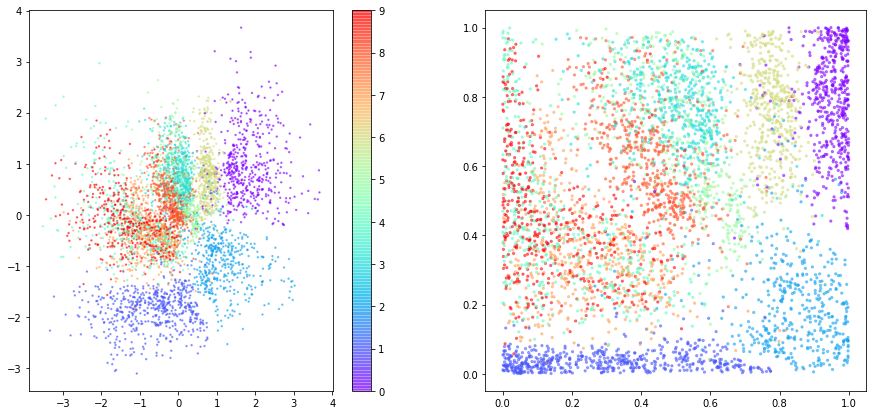

In [45]:
n_to_show = 5000
grid_size = 15
fig_height = 7
fig_width = 15

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)
p_points = norm.cdf(z_points)

fig = plt.figure(figsize=(fig_width, fig_height))

ax = fig.add_subplot(1, 2, 1)
plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar(plot_1)

ax = fig.add_subplot(1, 2, 2)
plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=5)

#this right plot shows that each color is approximately equally represented
#As you can see each color represents a specific number but keep in mind that there is no label in the data.
#the VAE has learned the various forms of digits by itself in order to help minimize reconstruction loss.
plt.show()

From the above figure, by coloring points in the latent space by digit, we can see that there is no preferential treatment of any one type. 

The righthand plot shows the space transformed into p-values, and we can see that each color is approximately equally represented. Again, it’s important to remember that the labels were not used at all during training—the VAE has learned the various forms of digits by itself in order to help minimize reconstruction loss.

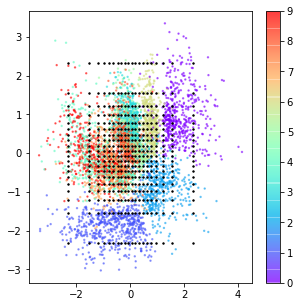

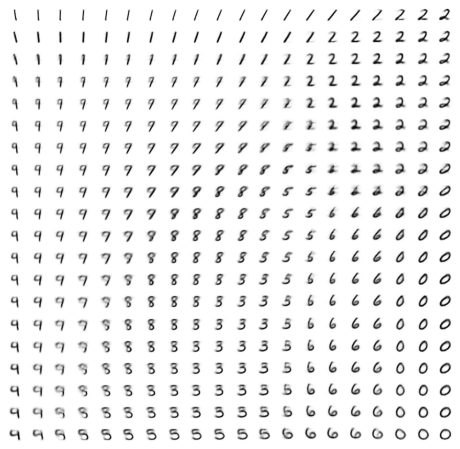

In [46]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=2)

plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')
    #As you can see the point which is in the border (In a place there is one color or two)have better quality rather than
    #the points inside(In a place where numbers are close together like 9 and 8)

In this tutorial we display the usage of AE, and VAE. All of our work on autoencoders and variational autoencoders has been limited to a latent space with two dimensions. 

This has helped us to visualize the inner workings of a VAE on the page and understand why the small tweaks that we made to the architecture of the autoencoder helped transform it into a more powerful class of network that can be used for generative modeling.